In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as stats
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
regData = pd.read_excel("regression.xlsx", sheetname=0)
regData.head()

City   Number_of_weekly_riders  Price_per_week  Population_of_city  \
0      1                   192000              15             1800000   
1      2                   190400              15             1790000   
2      3                   191200              15             1780000   
3      4                   177600              25             1778000   
4      5                   176800              25             1750000   

   Monthly_income_of_riders  Average_parking_rates_per_month  
0                      5800                               50  
1                      6200                               50  
2                      6400                               60  
3                      6500                               60  
4                      6550                               60

In [3]:
# 단순회귀분석
model = smf.ols("Number_of_weekly_riders ~ Price_per_week", regData).fit()

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Number_of_weekly_riders   R-squared:                       0.933
Model:                                 OLS   Adj. R-squared:                  0.930
Method:                      Least Squares   F-statistic:                     348.5
Date:                     Sat, 17 Jun 2017   Prob (F-statistic):           3.41e-16
Time:                             10:56:47   Log-Likelihood:                -270.39
No. Observations:                       27   AIC:                             544.8
Df Residuals:                           25   BIC:                             547.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.972e+05   2266.481     87.011      0.000      1.93e+05  2.02e+05
Price_per_week  -744.7487     39.894    -18.668      0.000      -826.912  -662.585
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.497
Skew:                           0.507   Prob(JB):                        0.473
Kurtosis:                       2.451   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## 단순회귀분석 연습1

In [6]:
model2 = smf.ols("Number_of_weekly_riders ~ Population_of_city", regData)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Number_of_weekly_riders   R-squared:                       0.806
Model:                                 OLS   Adj. R-squared:                  0.798
Method:                      Least Squares   F-statistic:                     103.6
Date:                     Sat, 17 Jun 2017   Prob (F-statistic):           2.24e-10
Time:                             10:56:57   Log-Likelihood:                -284.79
No. Observations:                       27   AIC:                             573.6
Df Residuals:                           25   BIC:                             576.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -3.137e+05   4.66e+04     -6.736      0.000      -4.1e+05 -2.18e+05
Population_of_city     0.2820      0.028     10.179      0.000         0.225     0.339
==============================================================================
Omnibus:                       14.264   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.606
Skew:                          -1.229   Prob(JB):                     0.000248
Kurtosis:                       5.953   Cond. No.                     4.25e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

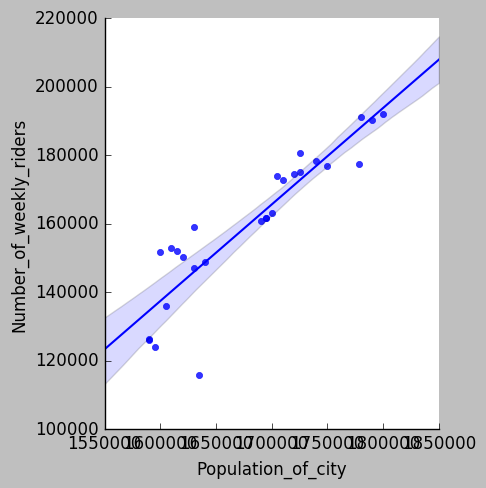

In [19]:
plt.rcdefaults()
sb.lmplot(y='Number_of_weekly_riders', x='Population_of_city', data=regData)
plt.show()

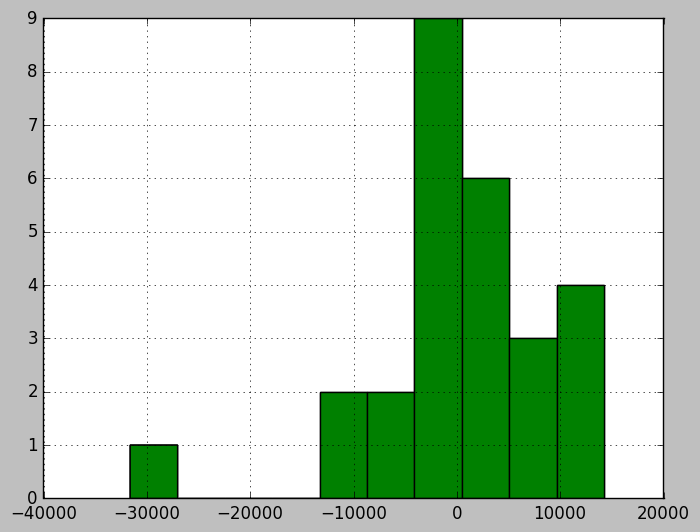

In [23]:
fitted2.predict()
fitted2.resid.hist()
plt.show()
stats.

In [34]:
model3 = stats.RLM(regData.Number_of_weekly_riders, regData.Population_of_city, M=stats.robust.norms.HuberT())
model3_fit = model3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Robust linear Model Regression Results                      
===================================================================================
Dep. Variable:     Number_of_weekly_riders   No. Observations:                   27
Model:                                 RLM   Df Residuals:                       26
Method:                               IRLS   Df Model:                            0
Norm:                               HuberT                                         
Scale Est.:                            mad                                         
Cov Type:                               H1                                         
Date:                     Sat, 17 Jun 2017                                         
Time:                             11:22:56                                         
No. Iterations:                          4                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Population_of_city     0.0968      0.002     53.529      0.000         0.093     0.100
======================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [36]:
model3_fit.cooks_distance()

AttributeError: 'RLMResults' object has no attribute 'cooks_distance'

In [5]:
# 다중회귀분석
model2 = smf.ols("Number_of_weekly_riders ~ Price_per_week+Population_of_city+Monthly_income_of_riders+Average_parking_rates_per_month", regData).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Number_of_weekly_riders   R-squared:                       0.945
Model:                                 OLS   Adj. R-squared:                  0.936
Method:                      Least Squares   F-statistic:                     95.40
Date:                     Thu, 11 May 2017   Prob (F-statistic):           1.44e-13
Time:                             04:56:54   Log-Likelihood:                -267.62
No. Observations:                       27   AIC:                             545.2
Df Residuals:                           22   BIC:                             551.7
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                        1.002e+05   1.36e+05      0.737      0.469     -1.82e+05  3.82e+05
Price_per_week                   -689.5227     95.403     -7.227      0.000      -887.376  -491.669
Population_of_city                  0.0549      0.072      0.759      0.456        -0.095     0.205
Monthly_income_of_riders           -1.3014      1.627     -0.800      0.432        -4.676     2.074
Average_parking_rates_per_month   152.4564     73.863      2.064      0.051        -0.726   305.639
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.982
Skew:                           0.656   Prob(JB):                        0.371
Kurtosis:                       2.802   Cond. No.                     2.20e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#Code for VIF Calculation

#Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)
        
#Calculating VIF values using that function
vif_cal(input_data=regData, dependent_col="Number_of_weekly_riders")

City   VIF =  303.76
Price_per_week  VIF =  6.3
Population_of_city  VIF =  36.89
Monthly_income_of_riders  VIF =  127.28
Average_parking_rates_per_month  VIF =  26.25


In [38]:
## 예제 : Boston
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()

In [40]:
print(boston.keys())

dict_keys(['target', 'data', 'DESCR', 'feature_names'])


In [42]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [43]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [45]:
bos = pd.DataFrame(boston.data)
bos.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [46]:
bos.columns = boston.feature_names
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [47]:
boston.target.shape

(506,)

In [48]:
bos['PRICE'] = boston.target
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [49]:
bos.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [50]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [51]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


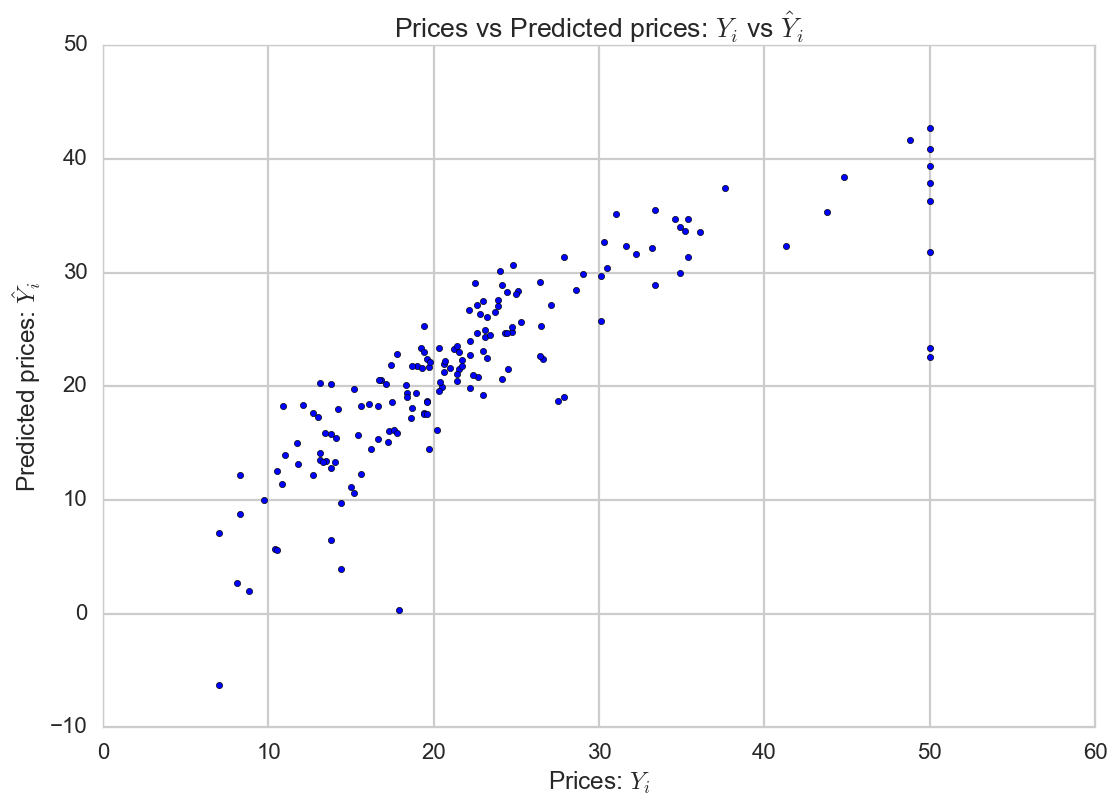

In [53]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [54]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse

28.541367275618992